In [1]:
%matplotlib widget

Data fetched for AAPL, entries: 198
Data fetched for AAPL, entries: 198


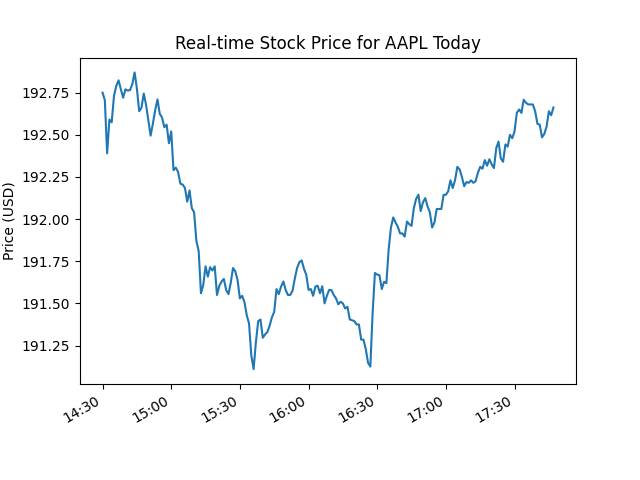

KeyboardInterrupt: 

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import time
import matplotlib.dates as mdates

# Define the function to fetch the historical stock prices for the day
def get_todays_prices(ticker_symbol):
    try:
        ticker = yf.Ticker(ticker_symbol)
        # Use interval='1m' for minute-level data during market hours
        todays_data = ticker.history(period='1d', interval='1m')
        print(f"Data fetched for {ticker_symbol}, entries: {len(todays_data)}")
        return todays_data
    except Exception as e:
        print(f"Error fetching historical prices: {e}")
        return None

# Replace 'AAPL' with the ticker symbol you want to track
ticker_symbol = 'AAPL'

# Fetch historical prices for today
todays_prices = get_todays_prices(ticker_symbol)

if todays_prices is not None and not todays_prices.empty:
    # Ensure the index is in the correct format
    todays_prices.index = pd.to_datetime(todays_prices.index)

    # Initialize plot
    fig, ax = plt.subplots()
    plt.ion()

    # Plot the initial data
    ax.plot(todays_prices.index, todays_prices['Close'])
    ax.set_title(f'Real-time Stock Price for {ticker_symbol} Today')
    ax.set_ylabel('Price (USD)')

    # Format the date on the x-axis
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)

    # Rotate date labels automatically
    fig.autofmt_xdate()

    # Fetch and update with the latest price
    for _ in range(20):  # As an example, update the plot 20 more times
        latest_data = get_todays_prices(ticker_symbol)
        if latest_data is not None and not latest_data.empty:
            latest_row = latest_data.iloc[[-1]]  # Get the last row as a DataFrame
            todays_prices = pd.concat([todays_prices, latest_row])  # Concatenate the new row

            # Clear the existing plot and create a new one
            ax.clear()
            ax.plot(todays_prices.index, todays_prices['Close'])
            ax.set_title(f'Real-time Stock Price for {ticker_symbol} Today')
            ax.set_ylabel('Price (USD)')
            ax.xaxis.set_major_formatter(myFmt)
            fig.autofmt_xdate()

            fig.canvas.draw()
            plt.pause(0.1)  # Pause briefly to allow the plot to be updated

        time.sleep(60)  # Sleep for 60 seconds between updates

    plt.ioff()  # Disable interactive mode

else:
    print("No data to plot. Please check if the market is open.")
